# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at Discount Motors, a used car dealership in the UK. The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months, and management would like your help designing a tool to assist these junior employees.

To start with, they would like you to work with the Toyota specialist to test your idea(s). They have collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the head of sales in a 10 minute presentation. The head of sales has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

# Table of Contents

1. **[Dataset](#Dataset)**
2. **[Analysis Plan](#Analysis)**
3. **[Exploratory Data Analysis](#Exploratory)**
4. **[Feature Engineering](#Feature)**
5. **[Machine Learning Model](#Machine)**

# 1. Dataset <a name="Dataset"></a>

The Toyota specialist provided a dataset containing historical sales data of Toyota cars from retailers, which consists of a total of **6738 rows** and **9 columns**. All the variables in this dataset are listed and described as below, where `price` will be our target variable.

## 1.1 Variables

| Variables | Details                                                                                                       |
|--------------|---------------------------------------------------------------------------------------------------------------|
| model        | Character, the model of the car, 18 possible values                                                           |
| year         | Numeric, year of manufacture from 1998 to 2020                                                                |
| **price**        | Numeric, listed value of the car in GBP                                                                       |
| transmission | Character, one of "Manual", "Automatic", "Semi-Auto" or "Other"                                               |
| mileage      | Numeric, listed mileage of the car at time of sale                                                             |
| fuelType     | Character, one of "Petrol", "Hybrid", "Diesel" or "Other"                                                     |
| tax          | Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car. |
| mpg          | Numeric, miles per gallon as reported by manufacturer                                                         |
| engineSize   | Numeric, listed engine size, one of 16 possible values                                                        |

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
df = pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


## 1.2 Handling missing values

In [4]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
for col in df.columns:
    if df[col].dtype.name == 'object':
        if np.nan in df[col].unique():
            print('nan detected in', str(col))
        else:
            print('no nan detected in', str(col))

no nan detected in model
no nan detected in transmission
no nan detected in fuelType


After checking for missing values in every single column, it seems that the dataset has **no missing values** at all, so no action needs to be taken.

## 1.3 Handling duplicates

In [6]:
df.duplicated().sum()

39

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

There were **39 duplicate rows** found, which were immediately **dropped** as they would create bias in our insights and model later on.

## 1.4 Handling characters

In [8]:
columns_cat = ['model', 'transmission', 'fuelType']
for col in columns_cat:
    df[col] = df[col].str.strip()
    print(df[col].unique())

['GT86' 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR' 'Prius' 'Avensis'
 'Verso' 'Hilux' 'PROACE VERSO' 'Land Cruiser' 'Supra' 'Camry' 'Verso-S'
 'IQ' 'Urban Cruiser']
['Manual' 'Automatic' 'Semi-Auto' 'Other']
['Petrol' 'Other' 'Hybrid' 'Diesel']


Extra spaces in the beginning and at the end of each non numerical value were removed to achieve **cleaner data**. The columns with numerical data types should be left as is, as the numerical data type already restricts any character error in the data.

## 1.5 Handling data types

In [9]:
columns_cat = ['model', 'transmission', 'fuelType']
for col in columns_cat:
    df[col] = df[col].astype('category')
df['year'] = df['year'].astype('category')

columns_cat = [col for col in df.columns if df[col].dtype.name == 'category']
for col in columns_cat:
    print(df[col].cat.categories)

Index(['Auris', 'Avensis', 'Aygo', 'C-HR', 'Camry', 'Corolla', 'GT86', 'Hilux',
       'IQ', 'Land Cruiser', 'PROACE VERSO', 'Prius', 'RAV4', 'Supra',
       'Urban Cruiser', 'Verso', 'Verso-S', 'Yaris'],
      dtype='object')
Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020],
           dtype='int64')
Index(['Automatic', 'Manual', 'Other', 'Semi-Auto'], dtype='object')
Index(['Diesel', 'Hybrid', 'Other', 'Petrol'], dtype='object')


In [10]:
df.dtypes

model           category
year            category
price              int64
transmission    category
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize       float64
dtype: object

The column `year` was converted into the **category data type** along with the other columns that previously had the object data type, namely `model`, `transmission`, and `fuelType`. Compared to the object data type, the category data type is much **smaller in size**, which is more efficient for Pandas to process.



# 2. Analysis Plan <a name="Analysis"></a>

This project is about predicting the prices of used cars that have already been sold, where the prices exist in the Toyota dataset that we have. This calls for a **supervised machine learning**. Since the target variable, namely `price`, is **numeric**, the model of choice will be **regression**. As for the model, a **multivariate linear regression** will be used to try and explain the data. If the linear regression model is able to achieve a decent result with initial test, then the decision will be to proceed with the linear regression  as the model of choice. Since this is a regression problem, the model evaluation will be based on the different metrics for regression to assess entire performance of the model.

Before we are able to predict the prices of the used cars, we need to get a better understanding of the sales trends in our dataset and discover which variables correlate with the price of the cars. With that said, the plan of analysis to execute our approach is as follows:

- Exploratory Data Analysis (EDA) to discover trends in sales of the used cars and highlight the variables that affect sales and price
- Feature Engineering and Selection based on the results of the EDA performed
- Testing the regression model and making improvements based on the model evaluations to achieve better scores and/or prediction efficiency

# 3. Exploratory Data Analysis <a name="Exploratory"></a>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', font_scale=1.25, context='notebook', palette='bright')

In [12]:
def labels(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

## 3.1 Overall Price Distribution

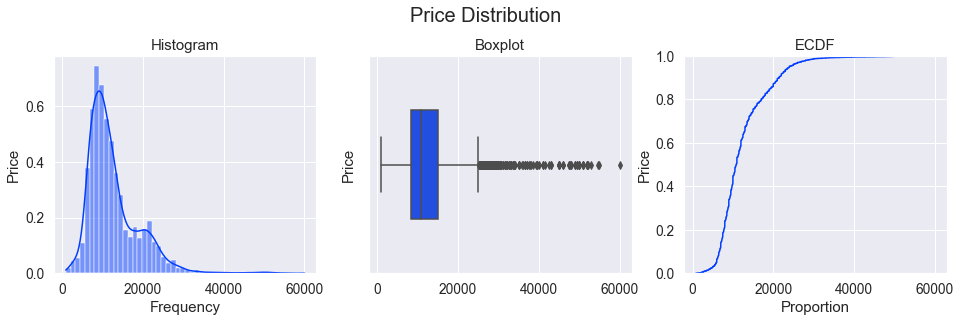

In [13]:
plt.figure(figsize=(16,4))
plt.suptitle('Price Distribution', fontsize=20, y=1.05)

plt.subplot(1,3,1)
sns.histplot(data=df, x='price', stat='frequency', bins=50, kde=True)
labels('Histogram', 'Frequency', 'Price')

plt.subplot(1,3,2)
sns.boxplot(data=df, x='price', width=0.5)
labels('Boxplot', '', 'Price')

plt.subplot(1,3,3)
sns.ecdfplot(data=df, x='price')
labels('ECDF', 'Proportion', 'Price')

plt.show()

In [14]:
df['price'].describe()

count     6699.000000
mean     12529.799074
std       6358.562625
min        850.000000
25%       8266.500000
50%      10798.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

In [15]:
iqr = st.iqr(df['price'])
q3 = np.percentile(df['price'], 75)
maximum=q3+iqr
maximum, q3, iqr

(21723.5, 14995.0, 6728.5)

**Conclusions**
- The distribution of used cars sales price is normally distributed, with a mean of £12529 and a median of £10798.
- The distribution is right-skewed, explained by having a mode less than the median and a median less than the mean.
- Being right-skewed indicates that the outliers are to the right, where the higher prices are.
- Cheaper cars are sold more than more expensive cars.
- The maximum of the box plot is at £21723, so the prices above that are considered outliers.
- Around 75% of the prices are below £15000

## 3.2 Categorical Variables

To explain the categorical variables, tables, bar charts, count plots, and histograms will be used. Tables will best explain columns with numerous categories, while columns with less catogeries can be best explained with histograms

### 3.2.1 Year

In [16]:
df = df.loc[df['year']!=1998]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [17]:
year_df = df.groupby('year').agg({'year':'count', 'price':['mean','median']}).sort_values(('year','count'), ascending=False)
year_df

year         price         
     count          mean   median
year                             
2017  2015  12191.800000  10498.0
2019  1265  16814.223715  12999.0
2018  1014  12384.738659  10702.5
2016   990  11702.282828  10877.5
2015   522   9886.078544   8998.5
2014   351   9060.062678   8990.0
2013   203   8413.438424   8490.0
2020   127  23033.236220  24990.0
2012    42   6634.595238   6245.0
2011    40   5341.425000   5597.5
2009    29   4160.413793   3750.0
2007    20   2797.500000   2817.5
2008    19   3926.210526   3995.0
2010    18   5397.500000   5242.5
2005    12   3054.416667   2597.0
2006    11   3109.454545   2750.0
2004     7   3893.571429   3495.0
2003     6   1984.166667   1845.0
2002     4   1811.000000   1799.5
1999     1   1995.000000   1995.0
2001     1    899.000000    899.0
2000     1   2695.000000   2695.0
1998     0           NaN      NaN

In [18]:
year_df.sort_values(('price','mean'), ascending=False)

year         price         
     count          mean   median
year                             
2020   127  23033.236220  24990.0
2019  1265  16814.223715  12999.0
2018  1014  12384.738659  10702.5
2017  2015  12191.800000  10498.0
2016   990  11702.282828  10877.5
2015   522   9886.078544   8998.5
2014   351   9060.062678   8990.0
2013   203   8413.438424   8490.0
2012    42   6634.595238   6245.0
2010    18   5397.500000   5242.5
2011    40   5341.425000   5597.5
2009    29   4160.413793   3750.0
2008    19   3926.210526   3995.0
2004     7   3893.571429   3495.0
2006    11   3109.454545   2750.0
2005    12   3054.416667   2597.0
2007    20   2797.500000   2817.5
2000     1   2695.000000   2695.0
1999     1   1995.000000   1995.0
2003     6   1984.166667   1845.0
2002     4   1811.000000   1799.5
2001     1    899.000000    899.0
1998     0           NaN      NaN

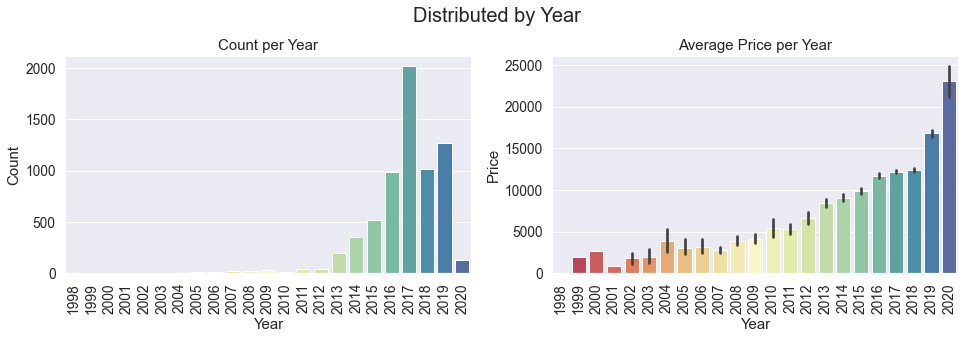

In [19]:
plt.figure(figsize=(16,4))
plt.suptitle('Distributed by Year', fontsize=20, y=1.05)

plt.subplot(1,2,1)
sns.countplot(data=df, x='year', palette="Spectral")
plt.xticks(rotation=90)
labels('Count per Year', 'Year', 'Count')

plt.subplot(1,2,2)
sns.barplot(data=df, x='year', y='price', palette="Spectral")
plt.xticks(rotation=90)
labels('Average Price per Year', 'Year', 'Price')
            
plt.show()

**Conclusions**
- Newer cars are typically more expensive than older cars, except for one car manufactured in 1998 that was overpriced, which is considered as an outlier and was dropped.
- Most of the cars sold were manufactured in 2017, forming left-skewed normal distribution, with 2017 as the mode.
- As it is left-skewed, the outliers in this case are older cars, and newer cars are more likely to be sold than older cars.

### 3.2.2 Model

In [20]:
model_df = df.groupby('model').agg({'model':'count', 'price':['mean','median']}).sort_values(('model','count'), ascending=False)
model_df

model         price         
              count          mean   median
model                                     
Yaris          2117  10548.840340  10645.0
Aygo           1940   7887.239175   7880.0
Auris           709  12524.730606  12750.0
C-HR            479  20651.540710  20695.0
RAV4            467  18200.421842  18695.0
Corolla         265  20972.675472  21850.0
Prius           232  18998.844828  18997.0
Avensis         114   9878.122807  10262.0
Verso           114  12169.157895  12496.5
Hilux            85  21581.176471  21495.0
GT86             73  19908.849315  18621.0
Land Cruiser     50  36817.100000  39498.0
PROACE VERSO     15  28680.200000  27990.0
Supra            12  50741.000000  49990.5
Camry            11  26910.090909  26491.0
IQ                8   4247.250000   4422.0
Urban Cruiser     4   4617.500000   4740.0
Verso-S           3   5746.666667   5795.0

In [21]:
model_df.sort_values(('price','mean'), ascending=False)

model         price         
              count          mean   median
model                                     
Supra            12  50741.000000  49990.5
Land Cruiser     50  36817.100000  39498.0
PROACE VERSO     15  28680.200000  27990.0
Camry            11  26910.090909  26491.0
Hilux            85  21581.176471  21495.0
Corolla         265  20972.675472  21850.0
C-HR            479  20651.540710  20695.0
GT86             73  19908.849315  18621.0
Prius           232  18998.844828  18997.0
RAV4            467  18200.421842  18695.0
Auris           709  12524.730606  12750.0
Verso           114  12169.157895  12496.5
Yaris          2117  10548.840340  10645.0
Avensis         114   9878.122807  10262.0
Aygo           1940   7887.239175   7880.0
Verso-S           3   5746.666667   5795.0
Urban Cruiser     4   4617.500000   4740.0
IQ                8   4247.250000   4422.0

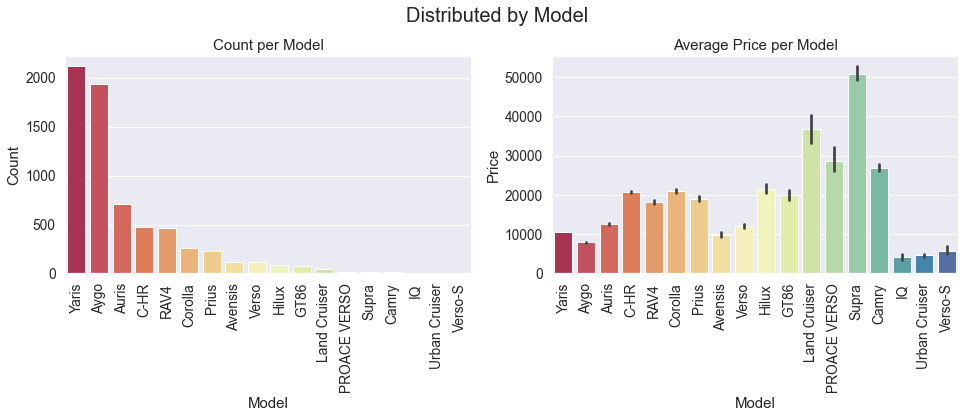

In [22]:
plt.figure(figsize=(16,4))
plt.suptitle('Distributed by Model', fontsize=20, y=1.05)

plt.subplot(1,2,1)
sns.countplot(data=df, x='model', order=df['model'].value_counts().index, palette="Spectral")
plt.xticks(rotation=90)
labels('Count per Model', 'Model', 'Count')

plt.subplot(1,2,2)
sns.barplot(data=df, x='model', y='price', order=df['model'].value_counts().index, palette="Spectral")
plt.xticks(rotation=90)
labels('Average Price per Model', 'Model', 'Price')
            
plt.show()

**Conclusions**
- Yaris and Aygo are the best selling cars, with Auris, C-HR, and RAV4 trailing behind quite far in that particular order.
- Supra is the most expensive car sold, however, it is not doing well in terms of the quantity of sales.
- There are less sales for expensive cars. However, even though IQ, Urban Cruiser, and Verso-S are cheap, they are not doing well in terms of sales.

### 3.2.3 Transmission

In [23]:
transmission_df = df.groupby('transmission').agg({'transmission':'count', 'price':['mean','median']}).sort_values(('transmission','count'), ascending=False)
transmission_df

transmission         price         
                    count          mean   median
transmission                                    
Manual               3792   9538.254219   8995.0
Automatic            2651  16588.761222  14999.0
Semi-Auto             254  14797.137795   9995.0
Other                   1  12795.000000  12795.0

In [24]:
transmission_df.sort_values(('price','mean'), ascending=False)

transmission         price         
                    count          mean   median
transmission                                    
Automatic            2651  16588.761222  14999.0
Semi-Auto             254  14797.137795   9995.0
Other                   1  12795.000000  12795.0
Manual               3792   9538.254219   8995.0

In [25]:
df['transmission'].value_counts()

Manual       3792
Automatic    2651
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

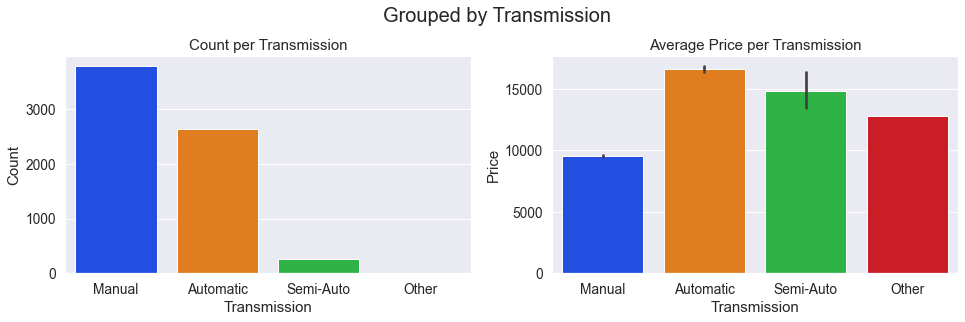

In [26]:
plt.figure(figsize=(16,4))
plt.suptitle('Grouped by Transmission', fontsize=20, y=1.05)
plt.subplot(1,2,1)
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index)
labels('Count per Transmission', 'Transmission', 'Count')
plt.subplot(1,2,2)
sns.barplot(data=df, x='transmission', y='price', order=df['transmission'].value_counts().index)
labels('Average Price per Transmission', 'Transmission', 'Price')
plt.show()

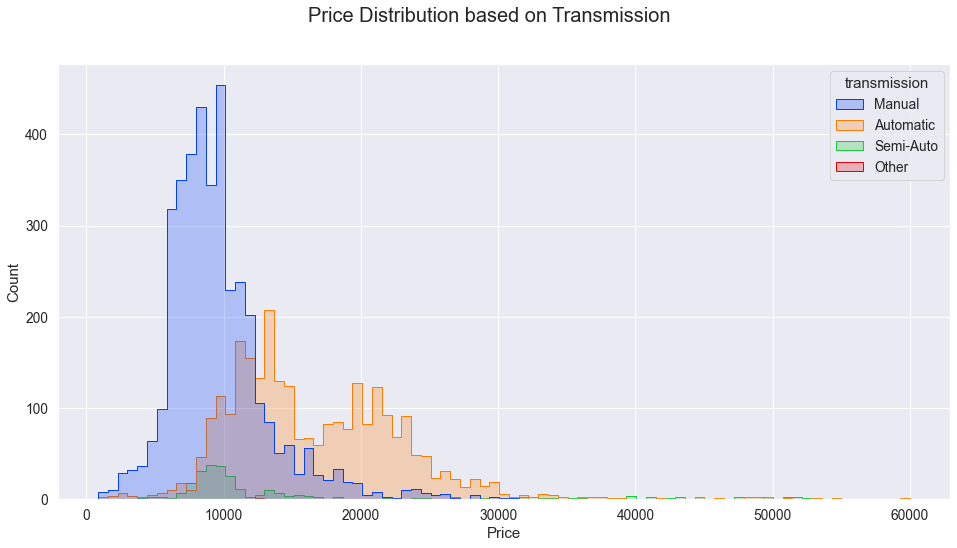

In [27]:
plt.figure(figsize=(16,8))
plt.suptitle('Price Distribution based on Transmission', fontsize=20, y=0.98)
sns.histplot(data=df, x='price', hue='transmission', hue_order=[x for x in transmission_df.index], element='step')
labels('', 'Price', 'Count')
plt.show()

**Conclusions**
- Manual cars have the most sales, with automatic cars trailing behind.
- In terms of price, automatic cars are the most expensive, with semi-auto trailing behind, and then other cars and manual in that order.
- The manual cars prices form a right-skewed normal distribution, meaning that cheaper manual cars are more likely to be sold than more expensive ones.

### 3.2.4 Fuel Type

In [28]:
fuel_df = df.groupby('fuelType').agg({'fuelType':'count', 'price':['mean','median']}).sort_values(('fuelType','count'), ascending=False)
fuel_df

fuelType         price         
            count          mean   median
fuelType                                
Petrol       4058   9754.594628   8998.0
Hybrid       2040  17187.811765  16470.0
Diesel        495  15731.577778  12498.0
Other         105  14121.161905  10250.0

In [29]:
fuel_df.sort_values(('price','mean'), ascending=False)

fuelType         price         
            count          mean   median
fuelType                                
Hybrid       2040  17187.811765  16470.0
Diesel        495  15731.577778  12498.0
Other         105  14121.161905  10250.0
Petrol       4058   9754.594628   8998.0

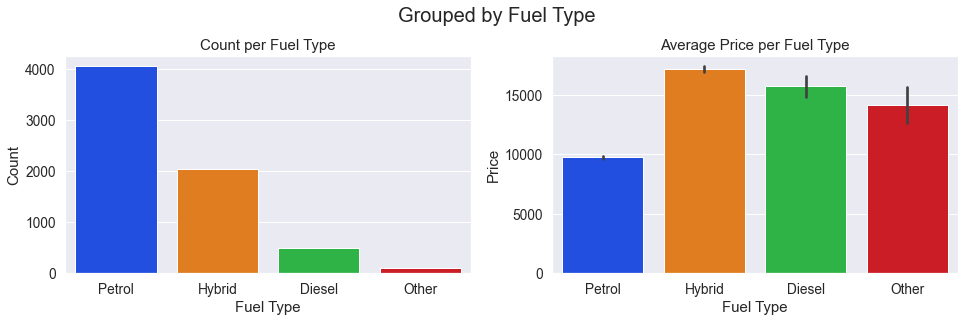

In [30]:
plt.figure(figsize=(16,4))
plt.suptitle('Grouped by Fuel Type', fontsize=20, y=1.05)
plt.subplot(1,2,1)
sns.countplot(data=df, x='fuelType', order=df['fuelType'].value_counts().index)
labels('Count per Fuel Type', 'Fuel Type', 'Count')
plt.subplot(1,2,2)
sns.barplot(data=df, x='fuelType', y='price', order=df['fuelType'].value_counts().index)
labels('Average Price per Fuel Type', 'Fuel Type', 'Price')
plt.show()

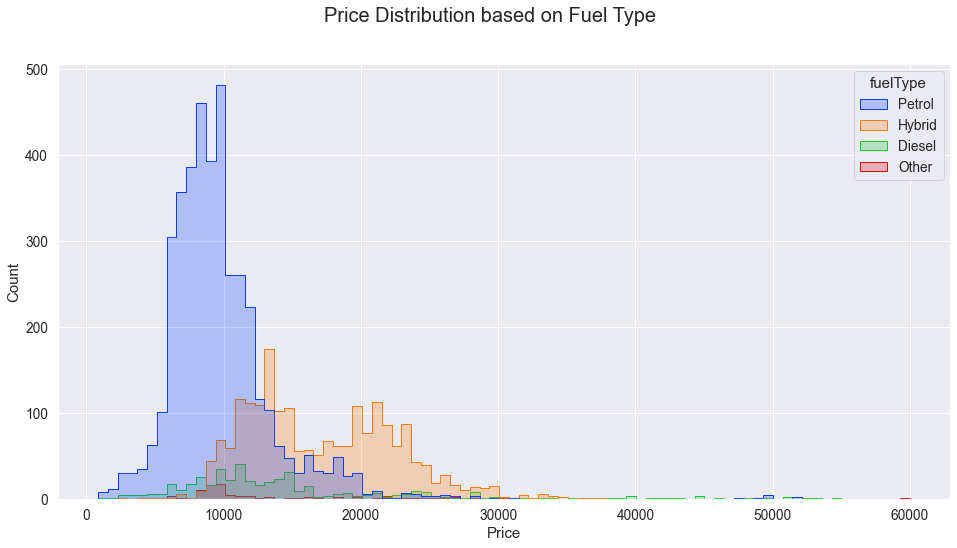

In [31]:
plt.figure(figsize=(16,8))
plt.suptitle('Price Distribution based on Fuel Type', fontsize=20, y=0.98)
sns.histplot(data=df, x='price', hue='fuelType', hue_order=[x for x in fuel_df.index], element='step')
labels('', 'Price', 'Count')
plt.show()

**Conclusion**
- Most of the cars that were sold used Petrol. Hybrid comes next, trailing by quite far, and then Diesel.
- Hybrid cars are the most expensive, while Petrol cars are the cheapest.
- The prices of the petrol cars form a right-skewed normal distribution, which means that there are more cheaper petrol cars are sold than expensive ones.

## 3.3 Numerical Variables

<Figure size 1152x576 with 0 Axes>

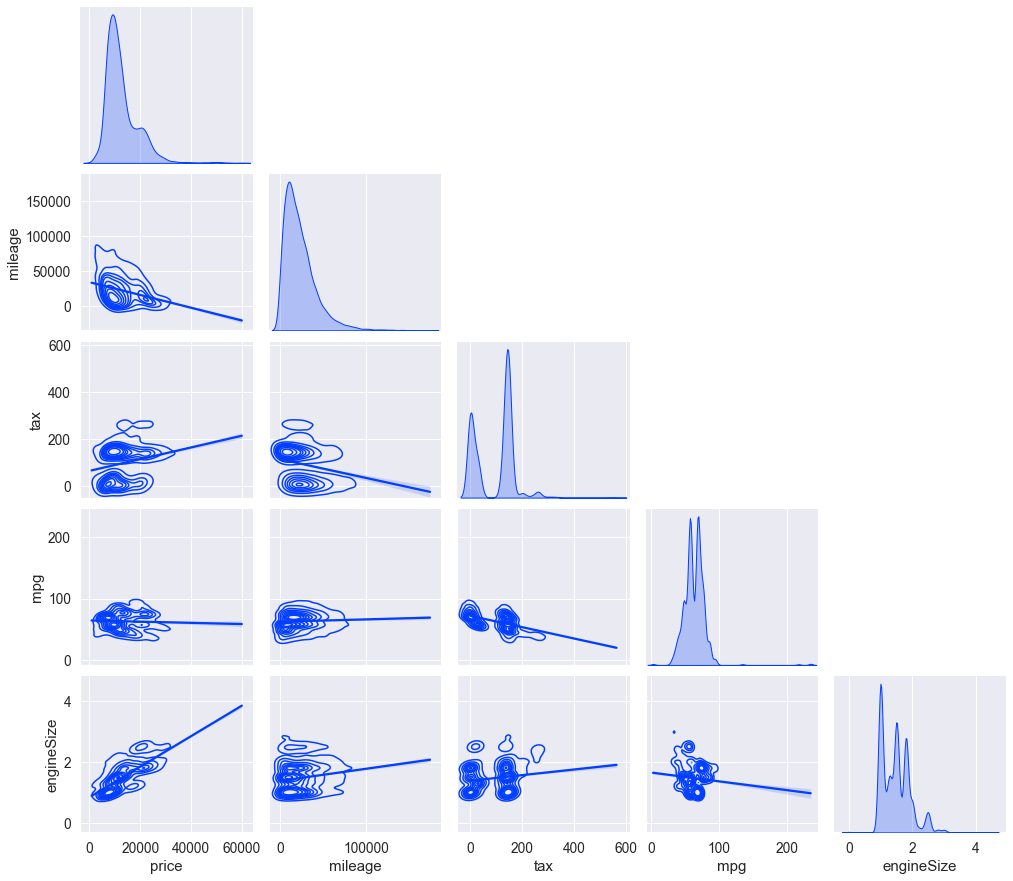

In [32]:
plt.figure(figsize=(16,8))
g = sns.pairplot(df, kind='kde', diag_kind='kde', corner=True, aspect=1.15)
g.map_lower(sns.regplot, scatter=False)
plt.show()

**Conclusions**

Using multiple KDE plots and regression plots, we can make inferences for our numerical variables, as the following:
- Out of all the variables, we can see that the best fitting line for price against engine size shows that these two variables are very much positively correlated.
- Price is positively correlated with tax, though not as much as engine size. Same with engine size, the higher the tax, the higher the price of the car.
- Price and miles per gallon are independent of each other, which indicates that there is a great chance mpg will not help predict the car prices.
- Price and mileage are negatively correlated, which means that a high mileage decreases the price of the car.

## 3.4 Multivariate Analysis

This section of analysis attempts to combine two separate variables in order to make inferences about the car prices.

### 3.4.1 Model and Transmission

In [33]:
df.groupby(['model', 'transmission']).agg({'model':'count', 'price':['mean','median']}).sort_values(('model','count'), ascending=False).dropna().head(20)

model         price         
                     count          mean   median
model   transmission                             
Aygo    Manual        1672   7686.297847   7592.5
Yaris   Manual        1334   9804.554723   9990.0
        Automatic      766  11890.265013  11995.0
Auris   Automatic      527  13655.314991  13590.0
C-HR    Automatic      394  21545.878173  21126.0
RAV4    Automatic      306  21302.176471  20412.0
Prius   Automatic      231  19049.705628  18999.0
Corolla Automatic      185  22924.416216  22790.0
Auris   Manual         180   9248.327778   9493.0
RAV4    Manual         157  12267.802548  12998.0
Aygo    Semi-Auto      157   9263.095541   9291.0
        Automatic      111   8968.000000   8973.0
Avensis Manual          94   9729.000000  10220.0
C-HR    Manual          85  16506.023529  15999.0
Corolla Manual          80  16459.275000  17827.5
Verso   Manual          65  10693.538462  11395.0
GT86    Manual          61  19852.868852  18522.0
Hilux   Manual          44  19794.113636  20189.0
        Automatic       41  23499.000000  22498.0
Verso   Semi-Auto       32  14306.062500  13998.0

### 3.4.2 Model and Fuel Type

In [34]:
df.groupby(['model', 'fuelType']).agg({'model':'count', 'price':['mean','median']}).sort_values(('model','count'), ascending=False).dropna().head(20)

model         price         
                      count          mean   median
model        fuelType                             
Aygo         Petrol    1881   7842.215843   7795.0
Yaris        Petrol    1529  10017.156965   9999.0
             Hybrid     556  12151.473022  12079.0
Auris        Hybrid     498  13821.915663  13825.0
C-HR         Hybrid     352  21759.215909  21497.0
RAV4         Hybrid     228  22989.245614  21009.0
Prius        Hybrid     214  18866.200935  18995.0
Corolla      Hybrid     181  23146.038674  22790.0
RAV4         Diesel     176  12467.767045  12998.0
Auris        Petrol     169   9673.739645   9998.0
C-HR         Petrol     120  17048.350000  16890.0
Hilux        Diesel      85  21581.176471  21495.0
Verso        Petrol      83  12658.084337  12990.0
Corolla      Petrol      81  16263.469136  17790.0
Avensis      Diesel      75   9125.893333   9750.0
GT86         Petrol      73  19908.849315  18621.0
Aygo         Other       59   9322.644068   9295.0
RAV4         Petrol      58  16542.724138  18359.5
Land Cruiser Diesel      50  36817.100000  39498.0
Auris        Diesel      41   8447.878049   8395.0

### 3.4.3 Transmission and Fuel Type

In [35]:
df.groupby(['transmission', 'fuelType'], dropna=True).agg({'transmission':'count', 'price':['mean','median']}).sort_values(('transmission','count'), ascending=False).dropna()

transmission         price         
                             count          mean   median
transmission fuelType                                    
Manual       Petrol           3412   9273.822392   8790.0
Automatic    Hybrid           2035  17197.475184  16495.0
             Petrol            420  12569.145238  11959.0
Manual       Diesel            371  11956.708895  11290.0
Semi-Auto    Petrol            226  11782.398230   9742.5
Automatic    Other             100  14453.620000  10595.0
             Diesel             96  23495.218750  22470.0
Semi-Auto    Diesel             28  39130.392857  39746.5
Manual       Other               5   7472.000000   7250.0
             Hybrid              4  13369.750000  13444.5
Other        Hybrid              1  12795.000000  12795.0

### 3.4.4 Year and Model

In [36]:
df.groupby(['year', 'model'], dropna=True).agg({'year':'count', 'price':['mean','median']}).sort_values(('year','count'), ascending=False).dropna().head(20)

year         price         
             count          mean   median
year model                               
2017 Aygo      646   7690.524768   7535.5
     Yaris     593  10638.527825  10250.0
2019 Yaris     396  12794.196970  12490.0
2018 Aygo      376   8411.664894   8300.0
     Yaris     369  11448.945799  10998.0
2019 Aygo      362   9805.281768   9792.5
2016 Yaris     315  10046.419048   9790.0
     Aygo      240   7046.600000   6995.0
2019 Corolla   225  21184.368889  21500.0
2017 Auris     218  14087.770642  14492.5
     C-HR      214  18799.331776  19493.0
2015 Yaris     171   8956.222222   8772.0
2016 Auris     154  12705.805195  12998.0
2017 RAV4      151  19071.039735  19862.0
2015 Aygo      144   6276.840278   6230.0
2016 RAV4      142  18446.838028  19143.0
2018 C-HR      139  20362.920863  20995.0
2015 Auris     115  11933.121739  12472.0
2014 Yaris     113   8143.787611   7995.0
2019 C-HR      108  24183.037037  24470.0

**Conclusions**
- Grouping by the model and transmission, we can see that Manual Aygo is the most popular type of car sold, with just costing just around £7686. Manual Yaris comes in second and is selling more than its Automatic counterpart and cost around respectively £9804 and £11890.
- Grouping by model and fuel type, the top two most sold are Petrol Aygo and Yaris Petrol
- Grouped by the transmission and fuel type, we see that Manual Petrol and Automatic Hybrid make the most sales.
- Grouped by year of manufacture and model, Aygo 2017 has the most sales, and then Yaris 2017 and 2019.

# 4. Feature Engineering <a name="Feature"></a>

Based on our EDA, there are multiple variables that are of interest to include in our machine learning model. Firstly, in our numerical variables, it was seen that mileage, tax, and especially engine size were positively correlated to the price of the car. By their normally distributed data, we also saw that cars manufactured in certain years, cars with certain model types, using certain types of transmission and fuel had a correlation to the sales count and prices of cars.

To further analyze which types of cars will be able to help in our price prediction, the categorical features will be broken further down for the machine learning model to test. As for the numerical features, since they all have different magnitudes, we will have to standardize them in order to eliminate the bias that can derive from the difference in magnitudes. 

Before we proceed in the model building, we need to make sure that our data is a single scalar number so that the machine learning will be able to read the data and develop its predictive ability.

## 4.1 Encoding

Categorical features are divided ordinal and nominal data type. This is important because ordinal and nominal data types are treated differently in the encoding process. The ordinal features will use the Label Encoding method to make sure that they are ordered correctly, while the nominal features will go through One Hot Encoding using Pandas get_dummies function to have each category in the column a separate feature on their own. In our dataset, year is considered to be ordinal, while the rest of categorical features are nomimal.

In [37]:
data = df

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label = LabelEncoder()
labeled = label.fit_transform(data['year'])
data['year'] = labeled
data['year'].value_counts()

18    2015
20    1265
19    1014
17     990
16     522
15     351
14     203
21     127
13      42
12      40
10      29
8       20
9       19
11      18
6       12
7       11
5        7
4        6
3        4
2        1
0        1
1        1
Name: year, dtype: int64

In [40]:
cats = ['model','transmission','fuelType']
encoded = pd.get_dummies(data[cats], prefix=cats)
data = data.join(encoded)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_Auris,...,model_Verso-S,model_Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,GT86,17,16000,Manual,24089,Petrol,265,36.2,2.0,0,...,0,0,0,1,0,0,0,0,0,1
1,GT86,18,15995,Manual,18615,Petrol,145,36.2,2.0,0,...,0,0,0,1,0,0,0,0,0,1
2,GT86,16,13998,Manual,27469,Petrol,265,36.2,2.0,0,...,0,0,0,1,0,0,0,0,0,1
3,GT86,18,18998,Manual,14736,Petrol,150,36.2,2.0,0,...,0,0,0,1,0,0,0,0,0,1
4,GT86,18,17498,Manual,36284,Petrol,145,36.2,2.0,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
for col in data.columns:
    if data[col].dtype.name == 'category':
        data = data.drop(col, axis=1)
data.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_Auris',
       'model_Avensis', 'model_Aygo', 'model_C-HR', 'model_Camry',
       'model_Corolla', 'model_GT86', 'model_Hilux', 'model_IQ',
       'model_Land Cruiser', 'model_PROACE VERSO', 'model_Prius', 'model_RAV4',
       'model_Supra', 'model_Urban Cruiser', 'model_Verso', 'model_Verso-S',
       'model_Yaris', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

The pre-existing categorical columns that are were one-hot-encoded are dropped, since our dataset now has separate columns for each separate categories in those columns.

## 4.2 Splitting Test and Training Data

Before we get to scaling the numerical values, one step we need to do before that is splitting the data into test set and training set. The reason we do not scale before is to prevent bias in the scaling. In the real world, the test set is data that our prediction model has never seen before, and thus we treat it the same way in the model building process.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train, test = train_test_split(data, train_size = 0.75, test_size = 0.25, random_state = 13)

## 4.3 Scaling

To eliminate bias caused by difference in the numerical magnitudes, the values of each numerical columns are scaled using the Standard Scaler method. The Standard Scaler is a method that by default standardizes numerical features by subtracting the data by the mean and dividing it by the standard deviation. Depending on the variability of each data point, the data point will be either be a negative or positive number around 0. Make sure that this is done for both the training and the testing set, albeit separately.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
columns_num = [col for col in df.columns if df[col].dtype.name != 'category']
columns_num

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

In [46]:
scaler_test = StandardScaler()
scaler_train = StandardScaler()
columns_num = [col for col in df.columns if df[col].dtype.name != 'category']

scaler_train.fit(train[columns_num])
train[columns_num] = scaler_train.transform(train[columns_num])

scaler_test.fit(test[columns_num])
test[columns_num] = scaler_test.transform(test[columns_num])

train.head()

C:\Users\fnurr\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\fnurr\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,year,price,mileage,tax,mpg,engineSize,model_Auris,model_Avensis,model_Aygo,model_C-HR,...,model_Verso-S,model_Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
1083,0.120165,-0.548972,-0.010729,-0.869918,-0.321306,-0.395593,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
57,0.120165,0.763955,-0.581286,0.678629,-1.695568,1.192970,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4944,-0.790226,-0.858286,1.015456,-1.273886,0.372129,-1.076406,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
665,-0.335030,0.964090,0.924246,-1.004574,-0.346522,2.327658,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5711,0.575360,1.458870,0.075705,0.543973,0.706239,0.739095,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


<AxesSubplot:>

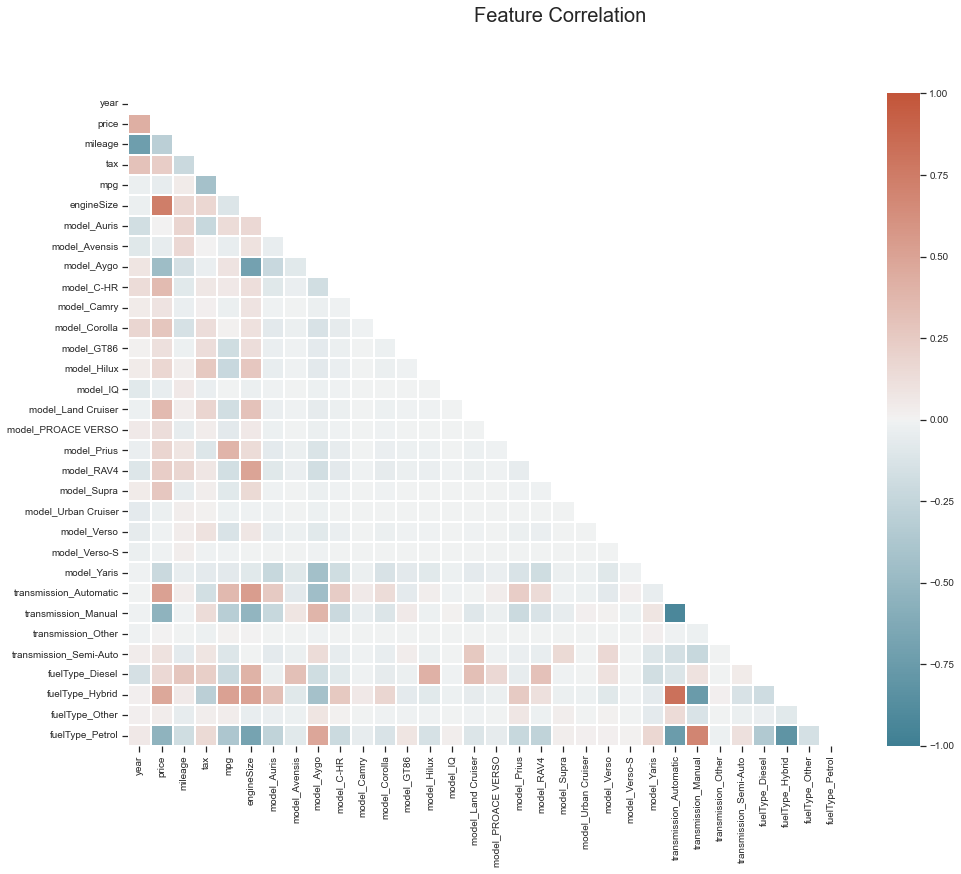

In [47]:
plt.figure(figsize=(16,12))
sns.set_theme(style='ticks', font_scale=0.9, context='notebook', palette='bright')
plt.suptitle('Feature Correlation', fontsize=20, y=0.98)

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, annot=False, linewidths=1.5, cmap=cmap, vmin=-1, vmax=1, mask=mask)

The above correlation graph shows how each feature interact with another. The color map used in this graph signal red for positive correlation, blue for negative correlation, and pure white for no correlation at all. Mostly, we are interested in seeing how the variables we have just created interacts with our target variable price.
- Dependent variables that are clear to have negative correlation to price are `Petrol Fuel type`, `annual transmission`, `Yaris model`, `Aygo model`, and `mileage`.
- Dependent variables that are clear to have positive correlation to price are `Hibrid Fuel type`, `Automatic transmission`, `Supra model`, `Land Cruiser model`, `Corolla model`, `C-HR model`, `engine size`, and `tax`. (Note that there are other positive correlations between price and other dependent variables, but closer to 0.)


## 4.4 Splitting Feature and Target Variables

Previously, our dataset was already split into training and testing set. They are further divided into feature variables and target variable, where our target variable is the price of the car.

In [48]:
y_train = train['price']
X_train = train.drop('price', axis=1)
y_test = test['price']
X_test = test.drop('price', axis=1)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((1675, 31), (5023, 31), (1675,), (5023,))

# 5. Machine Learning Model <a name="Machine"></a>

The goal of this section is to build a model that is able to predict the price of the cars using the feature variables as input.

As previously mentioned in the analysis plan, as our first machine learning model, we will use the simplest model, which is the linear regression model. If the model performs to a decent level based on its evaluation scores, we will proceed to use the model and attempt to improve the predictive ability of the model.

## 5.1 Initial Model Test

The initial model test uses all the features that exist in our dataset. To evaluate our initial model, we will use the Root Mean Squared Error (RMSE), which is the standard deviation of the residuals (prediction errors) given in absolute terms. The lower the RMSE score, the lower our prediction errors, in other words, the better our prediction results. Based on a rule of thumb, a good RMSE ranges around 0.2 and 0.5, which indicates that the model has a relatively accurate predictive ability. Amazingly, the linear regression model was able to achieve around 0.27 score of RMSE, which is considered to be decent based on the rule of thumb. The evalation is done using cross validation, switching the folds in the training data to ensure that the model is robust when tested with different data.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [50]:
reg = LinearRegression()
reg.fit(X_train,y_train)
cv_results = cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print(abs(cv_results))
print(abs(np.mean(cv_results)))

[0.24063041 0.29676593 0.30261413 0.25894769 0.25946638]
0.27168490828951214


## 5.2 Reducing Dimensionality

While the model has already achieved a good evaluation score, the model is still using practically all the features that exist in the dataset. That means there is more calculation done when predicting the target variable, and the prediction is inefficient. As such, we need to reduce the dimension of the data used in the model by removing columns that only have a small impact on the model's predictive ability. We use the Cross Validated Recursive Feature Elimination to help eliminate the features that do not positively impact the model's prediction based on the scores outputted.

In [51]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [52]:
min_features_to_select=1
rfecv = RFECV(estimator=reg, step=1, cv=KFold(5), scoring='neg_root_mean_squared_error', min_features_to_select=min_features_to_select)
rfecv.fit(X_train,y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.score(X_train,y_train))

Optimal number of features : 29
0.9278193199140706


In [53]:
print(abs(rfecv.grid_scores_))

[0.96373565 0.8956323  0.88680676 0.8831409  0.88300946 0.88172106
 0.83884697 0.76573521 0.719418   0.62608228 0.59017313 0.54376737
 0.5215695  0.39947463 0.36264925 0.31792656 0.30744052 0.30065758
 0.28815975 0.27693489 0.27466176 0.27440223 0.27428172 0.27396092
 0.2732742  0.27336828 0.27231649 0.27208809 0.27129471 0.27168491
 0.27168491]


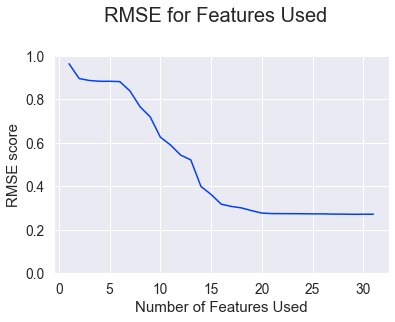

In [54]:
sns.set_theme(style='darkgrid', font_scale=1.25, context='notebook', palette='bright')

plt.figure(figsize=(6,4))
plt.suptitle('RMSE for Features Used', fontsize=20, y=1.05)
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_)+min_features_to_select), abs(rfecv.grid_scores_))
labels('', 'Number of Features Used', 'RMSE score')
plt.ylim([0,1])
plt.show()

In [55]:
features = pd.DataFrame(X_train.columns)
features['ranking'] = rfecv.ranking_
features['support'] = rfecv.support_.astype('bool')
features[features['support'] == False]

,0,ranking,support
11,model_GT86,3,False
23,transmission_Automatic,2,False


In [56]:
X_train_new = X_train[X_train.columns[rfecv.support_]]
X_train_new.shape

(5023, 29)

In [57]:
X_test_new = X_test[X_train.columns[rfecv.support_]]
X_test_new.shape

(1675, 29)

In [58]:
reg = LinearRegression()
reg.fit(X_train_new,y_train)
cv_results = cross_val_score(reg, X_train_new, y_train, scoring='neg_root_mean_squared_error', cv=5)
print(abs(cv_results))
print(abs(np.mean(cv_results)))

[0.24063041 0.29676593 0.30256862 0.25894769 0.25921224]
0.2716249762783113


Initially, after the feature engineering section, we had used 31 columns in total. With the reduced dimension, we now have 29 columns, with 2 columns reduced which are `model_GT86` and `transmission_Automatic`. Even then, the model is still able to achieve a great RMSE score. In the graph above where we visualized the number of features used and the RMSE scores achieved, we can see that even with just 20 variables, the model should still be able to achieve a RMSE score below 0.3, where a 0.4 RMSE square is already considered acceptable.

## 5.3 Final Evaluation

We have already determined that our model has good predictive ability based on its RMSE score on cross validation. For our final evaluation, we will finally use the model to explain the testing set. The result of the evaluation seen below show that the model also has a low Mean Absolute Error, a low Mean Squared Error, and a R-Squared close to 1, that altogether signal to a good prediction result done by our linear regression model.

In [59]:
from sklearn import metrics
def print_evaluate(true, pred):
    mae = metrics.mean_absolute_error(true, pred)
    mse = metrics.mean_squared_error(true, pred)
    rmse = np.sqrt(metrics.mean_squared_error(true, pred))
    r2 = metrics.r2_score(true, pred)
    print("Mean Absolute Error : %f" % mae)
    print("Mean Squared Error : %f" % mse)
    print("Root Mean Absolute Error : %f" % rmse)
    print("R-Squared : %f" % r2)
#     return mae, mse, rmse, r2

In [60]:
y_pred = reg.predict(X_test_new)
print_evaluate(y_test,y_pred)

Mean Absolute Error : 0.175891
Mean Squared Error : 0.076460
Root Mean Absolute Error : 0.276514
R-Squared : 0.923540


When plotting the predicted value and the actual value of prices, we also see a good line of best fit indicated by a positive correlation.

C:\Users\fnurr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


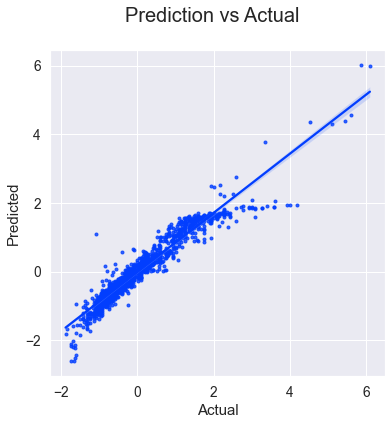

In [61]:
plt.figure(figsize=(6,6))
plt.suptitle('Prediction vs Actual', fontsize=20, y=0.98)
sns.regplot(y_test, y_pred, marker='.')
labels('', 'Actual', 'Predicted')
plt.show()

In [62]:
print(reg.intercept_)
print(reg.coef_)

0.9587296154960223
[ 0.26515402 -0.1794052  -0.04653299 -0.0248698   0.21154051 -0.90857169
 -0.72042164 -1.31726286 -0.05104919  0.16412538 -0.12048411  0.38382818
 -0.96848582  2.59386031  1.31612938 -0.14066261 -0.19060085  3.8240754
 -0.95656993 -0.73813586 -0.9888152  -1.1514441  -0.19036505  0.1438742
  0.01238209 -0.29152055  0.18874831  0.15500333 -0.05223109]


The formula of our final linear regression model is written as below.

In [63]:
print('y_hat = ', end='')
for i, x in enumerate(X_train_new.columns):
    print('('+str(rfecv.estimator_.coef_[i])+'*'+str(x)+') + ', end='')
print(rfecv.estimator_.intercept_)

y_hat = (0.2651540172815918*year) + (-0.179405203389089*mileage) + (-0.04653299193680091*tax) + (-0.02486979980326985*mpg) + (0.21154051016384887*engineSize) + (-0.9085716921678216*model_Auris) + (-0.7204216400041168*model_Avensis) + (-1.3172628646219477*model_Aygo) + (-0.051049189805647446*model_C-HR) + (0.16412538087009454*model_Camry) + (-0.1204841145788279*model_Corolla) + (0.3838281796465191*model_Hilux) + (-0.9684858194770906*model_IQ) + (2.5938603052933193*model_Land Cruiser) + (1.3161293791307453*model_PROACE VERSO) + (-0.14066260767362096*model_Prius) + (-0.1906008547861813*model_RAV4) + (3.824075399890922*model_Supra) + (-0.9565699302781723*model_Urban Cruiser) + (-0.7381358644751514*model_Verso) + (-0.9888152038499857*model_Verso-S) + (-1.1514440957299594*model_Yaris) + (-0.19036505346684104*transmission_Manual) + (0.14387419559406894*transmission_Other) + (0.012382091376478676*transmission_Semi-Auto) + (-0.29152054698498886*fuelType_Diesel) + (0.18874830795559633*fuelType_H

```
y_hat = (0.2651540172815917*year) + (-0.17940520338908858*mileage) + (-0.04653299193680081*tax) + (-0.024869799803269473*mpg) + (0.2115405101638497*engineSize) + (-0.9085716921678193*model_Auris) + (-0.7204216400041149*model_Avensis) + (-1.3172628646219469*model_Aygo) + (-0.05104918980564464*model_C-HR) + (0.16412538087009887*model_Camry) + (-0.12048411457882514*model_Corolla) + (0.3838281796465239*model_Hilux) + (-0.9684858194770936*model_IQ) + (2.5938603052933216*model_Land Cruiser) + (1.3161293791307533*model_PROACE VERSO) + (-0.1406626076736192*model_Prius) + (-0.19060085478617866*model_RAV4) + (3.8240753998909263*model_Supra) + (-0.9565699302781712*model_Urban Cruiser) + (-0.7381358644751473*model_Verso) + (-0.9888152038499867*model_Verso-S) + (-1.151444095729958*model_Yaris) + (-0.19036505346684146*transmission_Manual) + (0.14387419559406533*transmission_Other) + (0.012382091376479845*transmission_Semi-Auto) + (-0.2915205469849883*fuelType_Diesel) + (0.1887483079555975*fuelType_Hybrid) + (0.15500332598138006*fuelType_Other) + (-0.052231086951987735*fuelType_Petrol) + 0.9587296154960188
```

# 6. Summary

As a result of our analysis, we were able to build a linear regression model that can accurately predict car prices, proven by the model evaluation scores. We can also see from the formula above how the variables interact with each other to predict our target variable by their coefficients -- certain model cars were more expensive will clearly have bigger coeffiecents and will then be affected by the transmission type and fuel type and other features involved in the formula. Ultimately, since we have already proven the accuracy and robustness of the prediction of our model, the model is guaranteed to be able to predict real world car prices just as well as it did with our testing set.

## 6.1 Future Works

- Further deliberate the accuracy-simplicity trade off by removing more features
- Test different models other than the Linear Regression to improve overall prediction
- Check out other datasets that is not from Toyota (Toyota bias)